Name: Zhuoyuan Xu (Kallen)

NetID: zx1137

**Problem 1**

(a)

In [36]:
from timedata import data
import numpy as np
import matplotlib.pyplot as plt

In [37]:
x_2049, x_4097, x_8193 = data.load_data()

In [38]:
dft_2049 = np.fft.fft(x_2049)
dft_4097 = np.fft.fft(x_4097)
dft_8193 = np.fft.fft(x_8193)

freq_2049 = np.fft.fftfreq(2049, d=1.0/2049)
freq_4097 = np.fft.fftfreq(4097, d=1.0/4097)
freq_8193 = np.fft.fftfreq(8193, d=1.0/8193)

Text(0.5, 1.0, 'DFT Coefficients, N=8193')

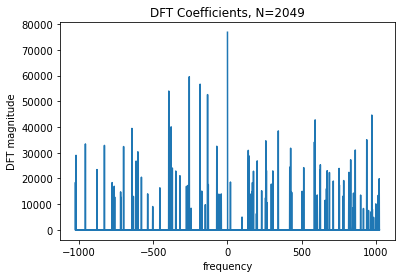

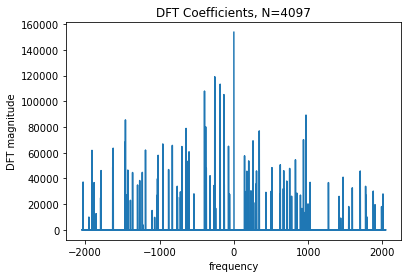

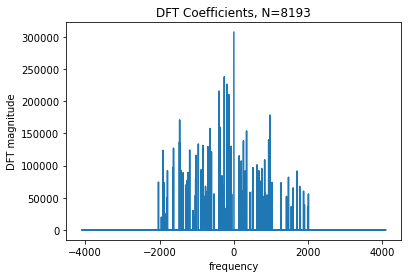

In [39]:
fig, ax = plt.subplots()
ax.plot(freq_2049, np.abs(dft_2049))
ax.set_xlabel('frequency')
ax.set_ylabel('DFT magnitude')
ax.set_title('DFT Coefficients, N=2049')

fig, ax = plt.subplots()
ax.plot(freq_4097, np.abs(dft_4097))
ax.set_xlabel('frequency')
ax.set_ylabel('DFT magnitude')
ax.set_title('DFT Coefficients, N=4097')

fig, ax = plt.subplots()
ax.plot(freq_8193, np.abs(dft_8193))
ax.set_xlabel('frequency')
ax.set_ylabel('DFT magnitude')
ax.set_title('DFT Coefficients, N=8193')

The magnitude of the DFT coefficients increase as N increases. Meanwhile, different from the first 2 plots, the 3rd plot has magnitude close to 0 around the 2 ends of the x-axis using the sample spacing $d=\frac{1.0}{N}$.

(b) Assuing $k_c\leq4096$, $N=8193$ is able to reconstruct DFT without aliasing.

In [40]:
ak = dft_8193/8193
ind = np.argsort(np.abs(ak))
ind = ind[::-1]

In [41]:
print('The 1st largest |a_k|-values is {} with frequency {}.'.format(np.abs(ak)[ind[0]], freq_8193[ind[0]]))
print('The 2nd largest |a_k|-values is {} with frequency {}.'.format(np.abs(ak)[ind[1]], freq_8193[ind[1]]))
print('The 3rd largest |a_k|-values is {} with frequency {}.'.format(np.abs(ak)[ind[2]], freq_8193[ind[2]]))

The 1st largest |a_k|-values is 37.50000000000004 with frequency 0.0.
The 2nd largest |a_k|-values is 29.06026049897115 with frequency -257.0.
The 3rd largest |a_k|-values is 27.64566592581311 with frequency -184.0.


(c)

Suppose we have only computed $\hat{x}_{[8193]}$ and $k_c\leq4096$, by the Sampling Theorem, the bandlimited signal can be recovered exactly from $\hat{x}_{[8193]}$.

Under the assumption that the signal is bandlimited with a cut-off frequency of $\frac{k_{samp}}{T}$ where $N=2k_{samp}+1$, the formula for aliasing shows
$$\hat{x}^{rec}[k]=\sum_{(m-k)modN=0}\hat{x}[m]$$
where $\hat{x}$ denotes the true Fourier coefficients.

Thus to get the reconstructed Fourier coefficients of $\hat{x}_{[2049]}[3]$ for this problem, considering the sample sizes we have
$$\begin{split}\hat{x}_{[2049]}[3]&=\frac{2049}{8193}\sum_{(m-3)mod2049=0}\hat{x}_{[8193]}[m]\\&=\frac{2049}{8193}(\hat{x}_{[8193]}[3]+\hat{x}_{[8193]}[2052]+\hat{x}_{[8193]}[-2046]+\hat{x}_{[8193]}[-4095])\end{split}$$

In [43]:
ind_8193 = np.argsort(freq_8193)
ind_2049 = np.argsort(freq_2049)

In [45]:
ind = [1, 2050, 4099, 6148]
diff = np.abs(dft_2049[ind_2049[1027]]-(2049/8193)*np.sum(dft_8193[ind_8193[ind]]))
print('The absolute difference between the left hand side and the right hand size of the formula is', diff)

The absolute difference between the left hand side and the right hand size of the formula is 6.138941685573314e-12


(d) False. Even if the plots have 0 for $|k|>2048$, since in the formula of aliasing we are summing up the coefficients, it is still possible that sum is 0 but the individual terms are not 0. Also by observing the plot, it seems that the plots are not symmetric and this also shows potential aliasing.

**Problem 2**

(a) In DFT, we define $F_{[N]}$ as
$$F_{[N]}=\begin{bmatrix}1&1&1&...&1\\1&exp(-\frac{i2\pi}{N})&exp(-\frac{i2\pi2}{N})&...&exp(-\frac{i2\pi(N-1)}{N})\\...\\1&exp(-\frac{i2\pi(N-1)}{N})&exp(-\frac{i2\pi2(N-1)}{N})&...&exp(-\frac{i2\pi(N-1)^2}{N})\end{bmatrix}$$

and the even columns are $$(F_{[N]})_{:,2k}=\begin{bmatrix}1&1&1&...&1\\1&exp(-\frac{i2\pi2}{N})&exp(-\frac{i2\pi4}{N})&...&exp(-\frac{i2\pi(N-2)}{N})\\...\\1&exp(-\frac{i2\pi2(N-1)}{N})&exp(-\frac{i2\pi4(N-1)}{N})&...&exp(-\frac{i2\pi(N-1)(N-2)}{N})\end{bmatrix}$$

These even columns can be scaled to yield odd columns by multiplying a diagonal matrix $D$,
$$D=\begin{bmatrix}exp(-\frac{i2\pi0}{N})&0&0&...&0\\0&exp(-\frac{i2\pi1}{N})&0&...&0\\...\\0&0&0&...&exp(-\frac{i2\pi(N-1)}{N})\end{bmatrix}$$

Then the odd columns can be written as $$(F_{[N]})_{:,2k+1}=D(F_{[N]})_{:,2k}$$

(b) The first half of $(F_{[N]})$ can be written as
$$(F_{[N]})_{0:N/2-1,2k}=\begin{bmatrix}1&1&1&...&1\\1&exp(-\frac{i2\pi2}{N})&exp(-\frac{i2\pi4}{N})&...&exp(-\frac{i2\pi(N-2)}{N})\\...\\1&exp(-\frac{i2\pi2(N/2-1)}{N})&exp(-\frac{i2\pi4(N/2-1)}{N})&...&exp(-\frac{i2\pi(N/2-1)(N-2)}{N})\end{bmatrix}$$

Then the second half can be expressed as
$$\begin{split}
(F_{[N]})_{N/2:,2k}
&=\begin{bmatrix}1&exp(-\frac{i2\pi2(N/2)}{N})&exp(-\frac{i2\pi4(N/2)}{N})&...&exp(-\frac{i2\pi(N-2)(N/2)}{N})\\1&exp(-\frac{i2\pi2(N/2+1)}{N})&exp(-\frac{i2\pi4(N/2+1)}{N})&...&exp(-\frac{i2\pi(N-2)(N/2+1)}{N})\\...\\1&exp(-\frac{i2\pi2(N-1)}{N})&exp(-\frac{i2\pi4(N-1)}{N})&...&exp(-\frac{i2\pi(N-1)(N-2)}{N})\end{bmatrix}\\
&=\begin{bmatrix}1&1exp(-\frac{i2\pi2(N/2)}{N})&1exp(-\frac{i2\pi4(N/2)}{N})&...&1exp(-\frac{i2\pi(N-2)(N/2)}{N})\\1&exp(-\frac{i2\pi2(N/2)}{N})exp(-\frac{i2\pi2}{N})&exp(-\frac{i2\pi4(N/2)}{N})exp(-\frac{i2\pi4}{N})&...&exp(-\frac{i2\pi(N-2)(N/2)}{N})exp(-\frac{i2\pi(N-2)}{N})\\...\\1&exp(-\frac{i2\pi2(N/2-1)}{N})exp(-\frac{i2\pi2(N/2)}{N})&exp(-\frac{i2\pi4(N/2-1)}{N})exp(-\frac{i2\pi4(N/2)}{N})&...&exp(-\frac{i2\pi(N-2)(N/2-1)}{N})exp(-\frac{i2\pi(N-2)(N/2)}{N})\end{bmatrix}\\
&=\begin{bmatrix}1&1exp(-i\pi2)&1exp(-i\pi4)&...&1exp(-i\pi(N-2))\\1&exp(-i\pi2)exp(-\frac{i2\pi2}{N})&exp(-i\pi4)exp(-\frac{i2\pi4}{N})&...&exp(-i\pi(N-2))exp(-\frac{i2\pi(N-2)}{N})\\...\\1&exp(-\frac{i2\pi2(N/2-1)}{N})exp(-i\pi2)&exp(-\frac{i2\pi4(N/2-1)}{N})exp(-i\pi4)&...&exp(-\frac{i2\pi(N-2)(N/2-1)}{N})exp(-i\pi(N-2))\end{bmatrix}
\end{split}$$

By Euler's formula, $$exp(-i\pi)=exp(-i\pi N)=1$$ for an integer N.

Therefore, $$\begin{split}(F_{[N]})_{N/2:,2k}&=\begin{bmatrix}1&1&1&...&1\\1&exp(-\frac{i2\pi2}{N})&exp(-\frac{i2\pi4}{N})&...&exp(-\frac{i2\pi(N-2)}{N})\\...\\1&exp(-\frac{i2\pi2(N/2-1)}{N})&exp(-\frac{i2\pi4(N/2-1)}{N})&...&exp(-\frac{i2\pi(N/2-1)(N-2)}{N})\end{bmatrix}\\&=(F_{[N]})_{0:N/2-1,2k}\end{split}$$

(c) The k-th column of $(F_{[N/2]})_{:,k}$ can be written as
$$\begin{split}(F_{[N/2]})_{:,k}&=\begin{bmatrix}1\\exp(-\frac{i2\pi k}{N/2})\\...\\exp(-\frac{i2\pi k(N/2-1)}{N/2})\end{bmatrix}\\&=\begin{bmatrix}1\\exp(-\frac{i2\pi2k}{N})\\...\\exp(-\frac{i2\pi2k(N/2-1)}{N})\end{bmatrix}\end{split}$$

From the previous part we can see the k-th column of $(F_{[N]})_{0:N/2-1,2k}$ is
$$\begin{split}(F_{[N]})_{0:N/2-1,2k}&=\begin{bmatrix}1\\exp(-\frac{i2\pi2k}{N})\\...\\exp(-\frac{i2\pi2k(N/2-1)}{N})\end{bmatrix}\\&=(F_{[N/2]})_{:,k}\end{split}$$

**Problem 3**

(a) The complex conjugate of $exp(-ix)$ is $$\overline{exp(-ix)}=exp(ix)$$

Due to the conjugate symmetry property of DFT matrix, $(F_{[N]})_{j,k}=\overline{(F_{[N]})_{N-j,k}}$. This property can be shown by $$\begin{split}(F_{[N]})_{j,k}&=exp(\frac{-2\pi ijk}{N})\\&=exp(\frac{-2\pi ijk}{N})exp(\frac{2\pi ijN}{N})\\&=exp(\frac{-2\pi ij(N-k)}{N})\\&=\overline{(F_{[N]})_{N-j,k}}\end{split}$$

Meanwhile, the matrix is symmetrical i.e. $F_{[N]}=F_{[N]}^T$

Then in inverse DFT,
$$F^*[j,k]=F[N-j,k]$$
The permutation matrix swaps rows of an matrix A by PA, and columns of A by AP. Thus we have
$$F^*[j,k]=F[N-j,k]=PF[j,k]$$
and P in this case will be constructed by identity matrix with some rows swapped/exchanged.
$$P=\begin{bmatrix}1&0&...&0&0\\0&0&...&0&1\\...\\0&1&...&0&0\\1&0&...&0&0\end{bmatrix}$$

Then, $\frac{1}{N}F^*_{[N]}$ can be written as $\frac{1}{N}PF_{[N]}$

(b) The left-hand-side of the expression can be written as $$\begin{split}(F_{[N]}XF_{[N]})[j,k]&=F_{[N]}[j,:](X)F_{[N]}[:,k]\\&=\psi^T_jX\psi_k\end{split}$$

The right-hand-side of the expression can be written as
$$\begin{split}\hat{X}[j,k]&=<X,\psi_j\psi_k^T>\\&=tr(X^T\overline{(\psi_j\psi_k^T)})\\&=tr((\overline{\psi_j}^TX)\overline{\psi_k})\\&=tr((\psi_j^TX)\psi_k)\end{split}$$

Since $(\psi_j^TX)\psi_k$ results in a scalar, $$\hat{X}[j,k]=tr((\psi_j^TX)\psi_k)=\psi_j^TX\psi_k$$
Therefore, $$(F_{[N]}XF_{[N]})[j,k]=\hat{X}[j,k]$$

(c) Given $\hat{x}:L_2[0,1)^2\to C$ is real-valued, $\overline{exp(-ix)}=exp(ix)$$$\begin{split}\hat{x}[j,k]&=<x,\phi^{2D}_{j,k}>\\&=\int^{a+1}_{t_1=a}\int^{b+1}_{t_2=b}x(t_1,t_2)exp(-i2\pi jt_1)exp(-i2\pi kt_2)\mathrm{d} t_1\mathrm{d} t_2\end{split}$$
Following the same definition,
$$\begin{split}\hat{x}[-j,-k]&=<x,\phi^{2D}_{-j,-k}>\\&=\int^{a+1}_{t_1=a}\int^{b+1}_{t_2=b}x(t_1,t_2)exp(-i2\pi(-j)t_1)exp(-i2\pi(-k)t_2)\mathrm{d} t_1\mathrm{d} t_2\\&=\int^{a+1}_{t_1=a}\int^{b+1}_{t_2=b}x(t_1,t_2)exp(i2\pi jt_1)exp(i2\pi kt_2)\mathrm{d} t_1\mathrm{d} t_2\end{split}$$
Then the conjugate of this expression is going to be
$$\begin{split}\overline{\hat{x}[-j,-k]}&=\overline{<x,\phi^{2D}_{-j,-k}>}\\&=\int^{a+1}_{t_1=a}\int^{b+1}_{t_2=b}x(t_1,t_2)exp(i2\pi(-j)t_1)exp(i2\pi(-k)t_2)\mathrm{d} t_1\mathrm{d} t_2\\&=\int^{a+1}_{t_1=a}\int^{b+1}_{t_2=b}x(t_1,t_2)exp(-i2\pi jt_1)exp(-i2\pi kt_2)\mathrm{d} t_1\mathrm{d} t_2\end{split}$$

Therefore, $\overline{\hat{x}[-j,-k]}=\hat{x}[j,k]$

**Problem 4**

(a) Suppose we have a vector $y\in C^{N/2}$, $y=\hat{x}_{2k}$ where $k\geq0,2k<N$, since DFT and inverse DFT are matrix multiplication process, we can extend the original $y$ by filling 0 into Fourier coefficients corresponding to odd indices. For example in 1D case if we have $y=\begin{bmatrix}y_1&y_2&...\end{bmatrix}^T=\begin{bmatrix}\hat{x}_{0}&\hat{x}_{2}&...&\hat{x}_{N-1}\end{bmatrix}^T$ then we can extend it into
$$y_{est}=\begin{bmatrix}\hat{x}_{0}&0&\hat{x}_{2}&0&...&\hat{x}_{N-2}&0\end{bmatrix}^T$$ We can do the same extension process for higher dimensions.

Then the vector $x_{est}$ consistent with these measurements is
$$x_{est}=\frac{1}{N}F^*_{[N]}y_{est}$$
Still, in 1D this can be written as $$x_{est}=\frac{1}{N}F^*_{[N]}\begin{bmatrix}\hat{x}_{0}&0&\hat{x}_{2}&0&...&0\end{bmatrix}^T$$

(b)

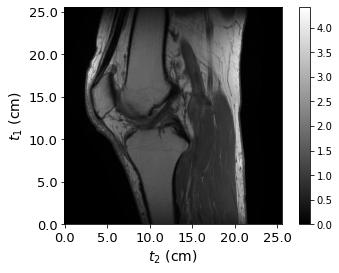

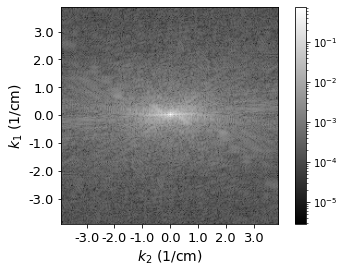

In [4]:
# copied from mr_undersampling.py
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.close('all')

knee_im_aux = 10000 * np.flipud(loadmat('image_knee.mat')['image_knee'].T)
knee_im = np.flipud(knee_im_aux) #this is the pixel domain image of knee mri

# sample plotting in the pixel domain

n = knee_im.shape[0]

factor = 20
ticks = np.arange(0,n,100)
tick_labels = ticks / factor

plt.figure()
ax = plt.gca()
im = plt.imshow(knee_im,origin='lower',cmap='gray')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
plt.ylabel(r'$t_1$ (cm)',fontsize=14)
plt.xlabel(r'$t_2$ (cm)',fontsize=14)
plt.tick_params(labelsize=13)
plt.colorbar()
plt.savefig('mri_samp_full.pdf',bbox_inches="tight",cmap='gray')


#take the fft of the pixel domain image
#work with this variable when undersampling
knee_ft = np.fft.fft2(knee_im)


#plotting the fft
fc = 100
f_tick_labels = np.arange(-3.0,3.1,1.0)
f_ticks = fc + f_tick_labels / (factor/n)
aux_diff = int((n-2*fc)/2)
knee_ft_aux = np.fft.fftshift(np.abs(knee_ft))/ n**2
knee_ft_plot = knee_ft_aux[aux_diff:(n-aux_diff),aux_diff:(n-aux_diff)]
plt.figure()
ax = plt.gca()
im =plt.imshow(knee_ft_plot,norm=colors.LogNorm(),origin='lower',cmap='gray')
plt.colorbar()
ax.set_xticks(f_ticks)
ax.set_xticklabels(f_tick_labels)
ax.set_yticks(f_ticks)
ax.set_yticklabels(f_tick_labels)
plt.ylabel(r'$k_1$ (1/cm)',fontsize=14)
plt.xlabel(r'$k_2$ (1/cm)',fontsize=14)
plt.tick_params(labelsize=13)
plt.savefig('mri_samp_full_fft.pdf',bbox_inches="tight",cmap='gray') 

In [46]:
#write your code to undersample knee_ft and use the plotting routines to generate plots in the pixel domain and fourier domain.
n = knee_im.shape[0]
odd_ind = np.arange(1, n, 2, dtype = int)

# reconstruct with even rows
ft_row = np.copy(knee_ft)
ft_row[odd_ind, :] = 0
im_row = np.fft.ifft2(ft_row)

# reconstruct with even cols
ft_col = np.copy(knee_ft)
ft_col[:, odd_ind] = 0
im_col = np.fft.ifft2(ft_col)

# reconstruct with even rows and cols
ft_even = np.copy(knee_ft)
ft_even[odd_ind, :] = 0
ft_even[:, odd_ind] = 0
im_even = np.fft.ifft2(ft_even)

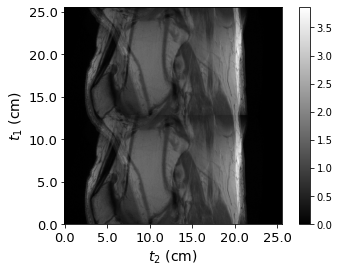

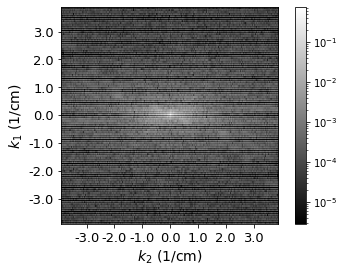

In [47]:
# images constructed by even rows
# reconstructed x
plt.figure()
ax = plt.gca()
im = plt.imshow(np.real(im_row),origin='lower',cmap='gray')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
plt.ylabel(r'$t_1$ (cm)',fontsize=14)
plt.xlabel(r'$t_2$ (cm)',fontsize=14)
plt.tick_params(labelsize=13)
plt.colorbar()

# fft
knee_ft_row_aux = np.fft.fftshift(np.abs(ft_row))/ n**2
knee_ft_row_plot = knee_ft_row_aux[aux_diff:(n-aux_diff),aux_diff:(n-aux_diff)]
knee_ft_row_plot[knee_ft_row_plot==0] = np.min(knee_ft_plot)
plt.figure()
ax = plt.gca()
im =plt.imshow(knee_ft_row_plot,norm=colors.LogNorm(),origin='lower',cmap='gray')
plt.colorbar()
ax.set_xticks(f_ticks)
ax.set_xticklabels(f_tick_labels)
ax.set_yticks(f_ticks)
ax.set_yticklabels(f_tick_labels)
plt.ylabel(r'$k_1$ (1/cm)',fontsize=14)
plt.xlabel(r'$k_2$ (1/cm)',fontsize=14)
plt.tick_params(labelsize=13)

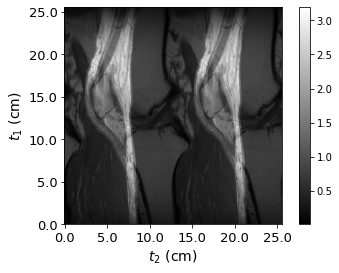

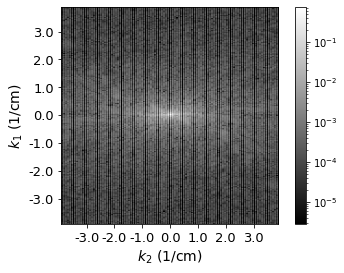

In [48]:
# images constructed by even cols
# reconstructed x
plt.figure()
ax = plt.gca()
im = plt.imshow(np.real(im_col),origin='lower',cmap='gray')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
plt.ylabel(r'$t_1$ (cm)',fontsize=14)
plt.xlabel(r'$t_2$ (cm)',fontsize=14)
plt.tick_params(labelsize=13)
plt.colorbar()

# fft
knee_ft_col_aux = np.fft.fftshift(np.abs(ft_col))/ n**2
knee_ft_col_plot = knee_ft_col_aux[aux_diff:(n-aux_diff),aux_diff:(n-aux_diff)]
knee_ft_col_plot[knee_ft_col_plot==0] = np.min(knee_ft_plot)
plt.figure()
ax = plt.gca()
im =plt.imshow(knee_ft_col_plot,norm=colors.LogNorm(),origin='lower',cmap='gray')
plt.colorbar()
ax.set_xticks(f_ticks)
ax.set_xticklabels(f_tick_labels)
ax.set_yticks(f_ticks)
ax.set_yticklabels(f_tick_labels)
plt.ylabel(r'$k_1$ (1/cm)',fontsize=14)
plt.xlabel(r'$k_2$ (1/cm)',fontsize=14)
plt.tick_params(labelsize=13)

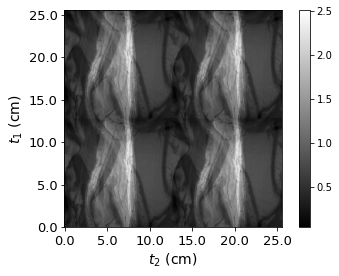

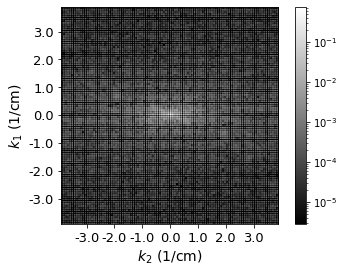

In [49]:
# images constructed by even indices
# reconstructed x
plt.figure()
ax = plt.gca()
im = plt.imshow(np.real(im_even),origin='lower',cmap='gray')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
plt.ylabel(r'$t_1$ (cm)',fontsize=14)
plt.xlabel(r'$t_2$ (cm)',fontsize=14)
plt.tick_params(labelsize=13)
plt.colorbar()

# fft
knee_ft_even_aux = np.fft.fftshift(np.abs(ft_even))/ n**2
knee_ft_even_plot = knee_ft_even_aux[aux_diff:(n-aux_diff),aux_diff:(n-aux_diff)]
knee_ft_even_plot[knee_ft_even_plot==0] = np.min(knee_ft_plot)
plt.figure()
ax = plt.gca()
im =plt.imshow(knee_ft_even_plot,norm=colors.LogNorm(),origin='lower',cmap='gray')
plt.colorbar()
ax.set_xticks(f_ticks)
ax.set_xticklabels(f_tick_labels)
ax.set_yticks(f_ticks)
ax.set_yticklabels(f_tick_labels)
plt.ylabel(r'$k_1$ (1/cm)',fontsize=14)
plt.xlabel(r'$k_2$ (1/cm)',fontsize=14)
plt.tick_params(labelsize=13)

(c) In 1D case we can express $y$ in terms of $x$ as $$y[k]=(F_{[N]})_{2k,:}x$$ with $k\geq0$ and $2k<N$ 
Since we can write $x_{est}$ as 
$$\begin{split}x_{est}&=\frac{1}{N}(F^*_{[N]})y_{est}\\&=\frac{1}{N}\sum_{k=0}^{N/2-1}(F^*_{[N]})_{:,2k}y[k]\\&=\frac{1}{N}\sum_{k=0}^{N/2-1}(F^*_{[N]})_{:,2k}(F_{[N]})_{2k,:}x\end{split}$$

From problem 2b, 2c and 3a, we know that $$(F_{[N]})_{0:N/2-1,2k}=(F_{[N]})_{N/2:,2k}=(F_{[N/2]})_{:,k}$$ and DFT and IDFT matrix are symmetric.
Thus, 
$$\begin{split}x_{est}&=\frac{1}{N}\sum_{k=0}^{N/2-1}\begin{bmatrix}F^*_{[N/2]}\\F^*_{[N/2]}\end{bmatrix}\begin{bmatrix}F_{[N/2]}&F_{[N/2]}\end{bmatrix}x\\&=\frac{1}{2}\begin{bmatrix}I_{[N/2]}&I_{[N/2]}\\I_{[N/2]}&I_{[N/2]}\end{bmatrix}x\\&=\frac{1}{2}\begin{bmatrix}x[0:\frac{N}{2}-1]+x[\frac{N}{2}:]\\x[0:\frac{N}{2}-1]+x[\frac{N}{2}:]\end{bmatrix}\end{split}$$

This expression is consistent with the images in part (b). In the reconstructed image using even rows, we can see a similar pattern appear on both the top half and the bottom half. Also it seems that the top and bottom halves of the original image were added together and appear in each half of the image in part (b).